In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
import sklearn
from sklearn import metrics
from sklearn.metrics import roc_auc_score ,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

In [3]:
dataset = pd.read_csv("/content/creditcard.csv")

In [4]:
dataset.shape

(23858, 31)

In [5]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [6]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23858 entries, 0 to 23857
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    23858 non-null  int64  
 1   V1      23858 non-null  float64
 2   V2      23858 non-null  float64
 3   V3      23858 non-null  float64
 4   V4      23858 non-null  float64
 5   V5      23858 non-null  float64
 6   V6      23858 non-null  float64
 7   V7      23858 non-null  float64
 8   V8      23858 non-null  float64
 9   V9      23858 non-null  float64
 10  V10     23858 non-null  float64
 11  V11     23858 non-null  float64
 12  V12     23858 non-null  float64
 13  V13     23858 non-null  float64
 14  V14     23858 non-null  float64
 15  V15     23858 non-null  float64
 16  V16     23858 non-null  float64
 17  V17     23858 non-null  float64
 18  V18     23858 non-null  float64
 19  V19     23858 non-null  float64
 20  V20     23858 non-null  float64
 21  V21     23858 non-null  float64
 22

In [8]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,...,23858.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000
mean,18213.370609,-0.239141,0.198892,0.727022,0.248619,-0.188428,0.082789,-0.132080,0.022901,0.499391,...,-0.041192,-0.137287,-0.038435,0.013626,0.127921,0.027504,0.013233,0.004932,73.976583,0.003689
std,11377.032190,1.894219,1.533073,1.724887,1.440938,1.439894,1.328159,1.334691,1.378382,1.274199,...,0.837207,0.644720,0.526298,0.588573,0.435896,0.520213,0.401059,0.267790,212.761278,0.060623
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-9.617915,0.000000,0.000000
25%,6624.750000,-0.959528,-0.376134,0.287941,-0.658457,-0.767634,-0.663707,-0.595277,-0.167688,-0.330826,...,-0.253906,-0.561223,-0.173814,-0.325615,-0.134460,-0.337167,-0.066242,-0.009446,5.990000,0.000000
50%,20564.000000,-0.288644,0.192491,0.874426,0.216440,-0.218348,-0.179887,-0.066356,0.027183,0.422417,...,-0.104848,-0.110305,-0.048570,0.064300,0.164769,-0.046463,0.006465,0.020002,18.040000,0.000000
75%,29010.250000,1.164867,0.843146,1.505467,1.122367,0.325281,0.474103,0.450460,0.286111,1.261519,...,0.066305,0.273088,0.074189,0.400535,0.407827,0.314884,0.094960,0.077392,66.000000,0.000000
max,32954.000000,1.960497,16.713389,4.101716,11.927512,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,13.876221,3.695503,5.525093,3.517346,11.135740,4.860769,7879.420000,1.000000


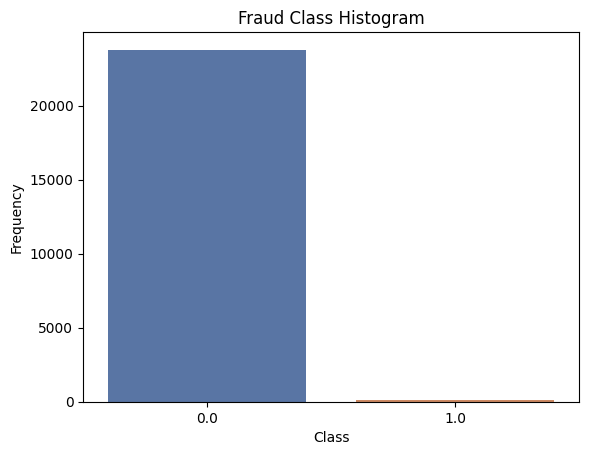

In [9]:
sns.countplot(x="Class", data=dataset, palette="deep")
plt.title("Fraud Class Histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()


array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

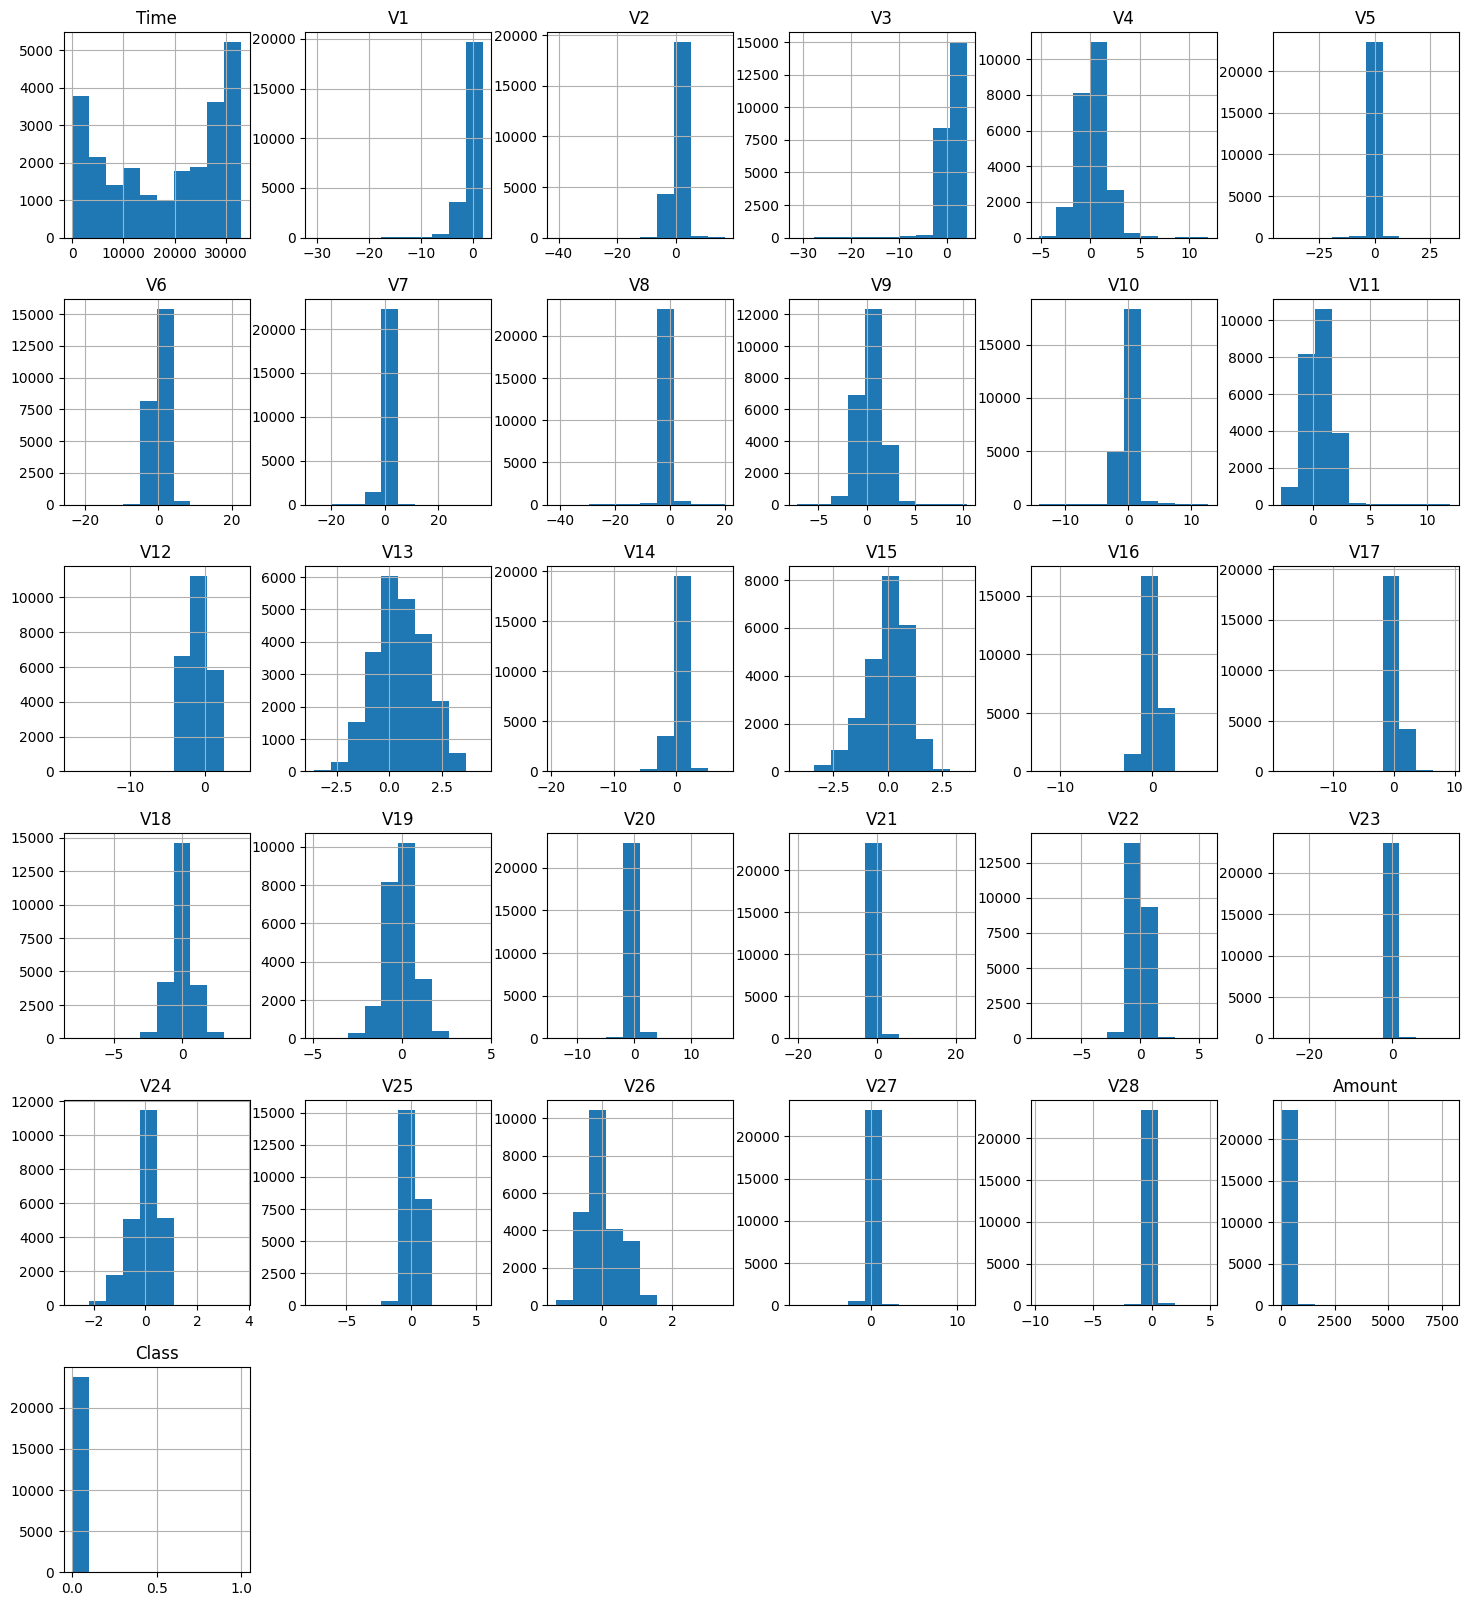

In [10]:
dataset.hist(figsize=(18,20))

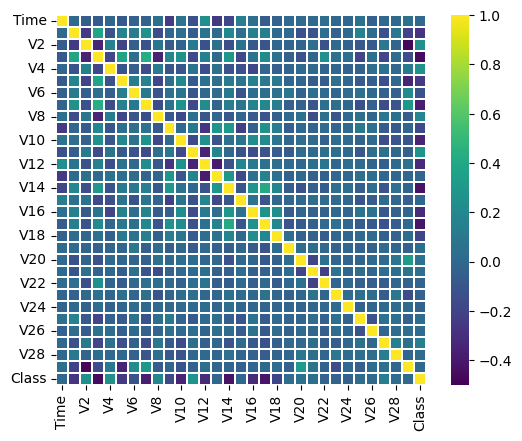

In [11]:
# fig = plt.figure(figsize = (20, 13))
sns.heatmap(dataset.corr(), cmap='viridis', vmax = 1, vmin=-0.5 , square = True , linewidths= 0.05)
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler

stc = StandardScaler()

dataset['scaled_amount'] = stc.fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset['scaled_time'] = stc.fit_transform(dataset['Time'].values.reshape(-1,1))

dataset.drop(['Amount' , 'Time'] , axis = 1 , inplace = True )

scaled_amount = dataset['scaled_amount']
scaled_time   = dataset['scaled_time']

dataset.drop(['scaled_amount' , 'scaled_time'] , axis = 1 , inplace = True )

dataset.insert(0 , 'scaled_amount' , scaled_amount)
dataset.insert(1 , 'scaled_time' , scaled_time)

dataset.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.355539,-1.600923,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0
1,-0.335061,-1.600923,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0
2,1.432074,-1.600835,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0
3,0.232770,-1.600835,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0
4,-0.018738,-1.600747,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0


In [13]:
dataset["Class"].value_counts()

0.0    23769
1.0       88
Name: Class, dtype: int64

In [14]:
legit = dataset[dataset.Class==0]
fraud = dataset[dataset.Class==1]

In [15]:
legit_sample = legit.sample(n=492)

In [16]:
new_dataset = pd.concat([legit_sample,fraud],axis=0)
#row-wise concat

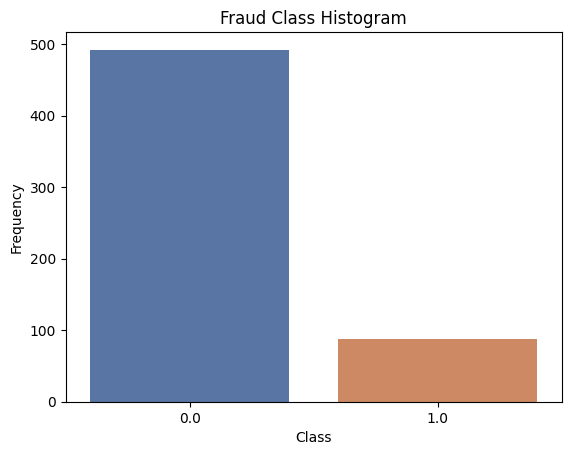

In [17]:
sns.countplot(x="Class", data=new_dataset, palette="deep")
plt.title("Fraud Class Histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [18]:
new_dataset.shape

(580, 31)

In [19]:
new_dataset.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
12081,0.924311,0.242391,0.642790,-0.749557,0.962627,1.494815,-0.877518,0.381207,-0.375225,0.049825,...,0.421091,0.170693,0.309997,-0.372841,-0.004496,0.425378,-0.324080,-0.008204,0.063237,0.0
2011,-0.338304,-1.464593,-1.818156,-0.737221,0.148602,-0.431525,1.155689,-1.832953,-0.300355,0.415241,...,0.324307,0.163721,-0.049658,-0.114077,-0.043751,-0.449536,0.852760,0.215105,-0.106387,0.0
12015,-0.292007,0.225866,1.185465,-0.389074,0.990193,-0.554455,-1.042982,-0.323837,-0.794323,0.077173,...,-0.240332,-0.140096,0.056700,0.006970,0.005627,0.368332,-0.693064,0.075033,0.025232,0.0
7659,0.141210,-0.667356,-1.727211,0.161010,1.257464,-1.819248,-0.228393,-1.557528,0.564721,0.202498,...,0.153455,-0.158779,-0.414495,0.118870,0.650300,0.320831,-1.144272,0.193966,0.025116,0.0
8883,-0.250975,-0.530674,-0.294072,0.836356,0.907624,-1.206944,0.924165,-0.794616,1.186701,-0.624782,...,-0.030975,-0.235631,-0.282717,-0.308153,-0.410254,0.068199,0.809623,-0.387955,-0.233055,0.0


In [20]:
new_dataset["Class"].value_counts()

0.0    492
1.0     88
Name: Class, dtype: int64

In [21]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580 entries, 12081 to 23422
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scaled_amount  580 non-null    float64
 1   scaled_time    580 non-null    float64
 2   V1             580 non-null    float64
 3   V2             580 non-null    float64
 4   V3             580 non-null    float64
 5   V4             580 non-null    float64
 6   V5             580 non-null    float64
 7   V6             580 non-null    float64
 8   V7             580 non-null    float64
 9   V8             580 non-null    float64
 10  V9             580 non-null    float64
 11  V10            580 non-null    float64
 12  V11            580 non-null    float64
 13  V12            580 non-null    float64
 14  V13            580 non-null    float64
 15  V14            580 non-null    float64
 16  V15            580 non-null    float64
 17  V16            580 non-null    float64
 18  V17 

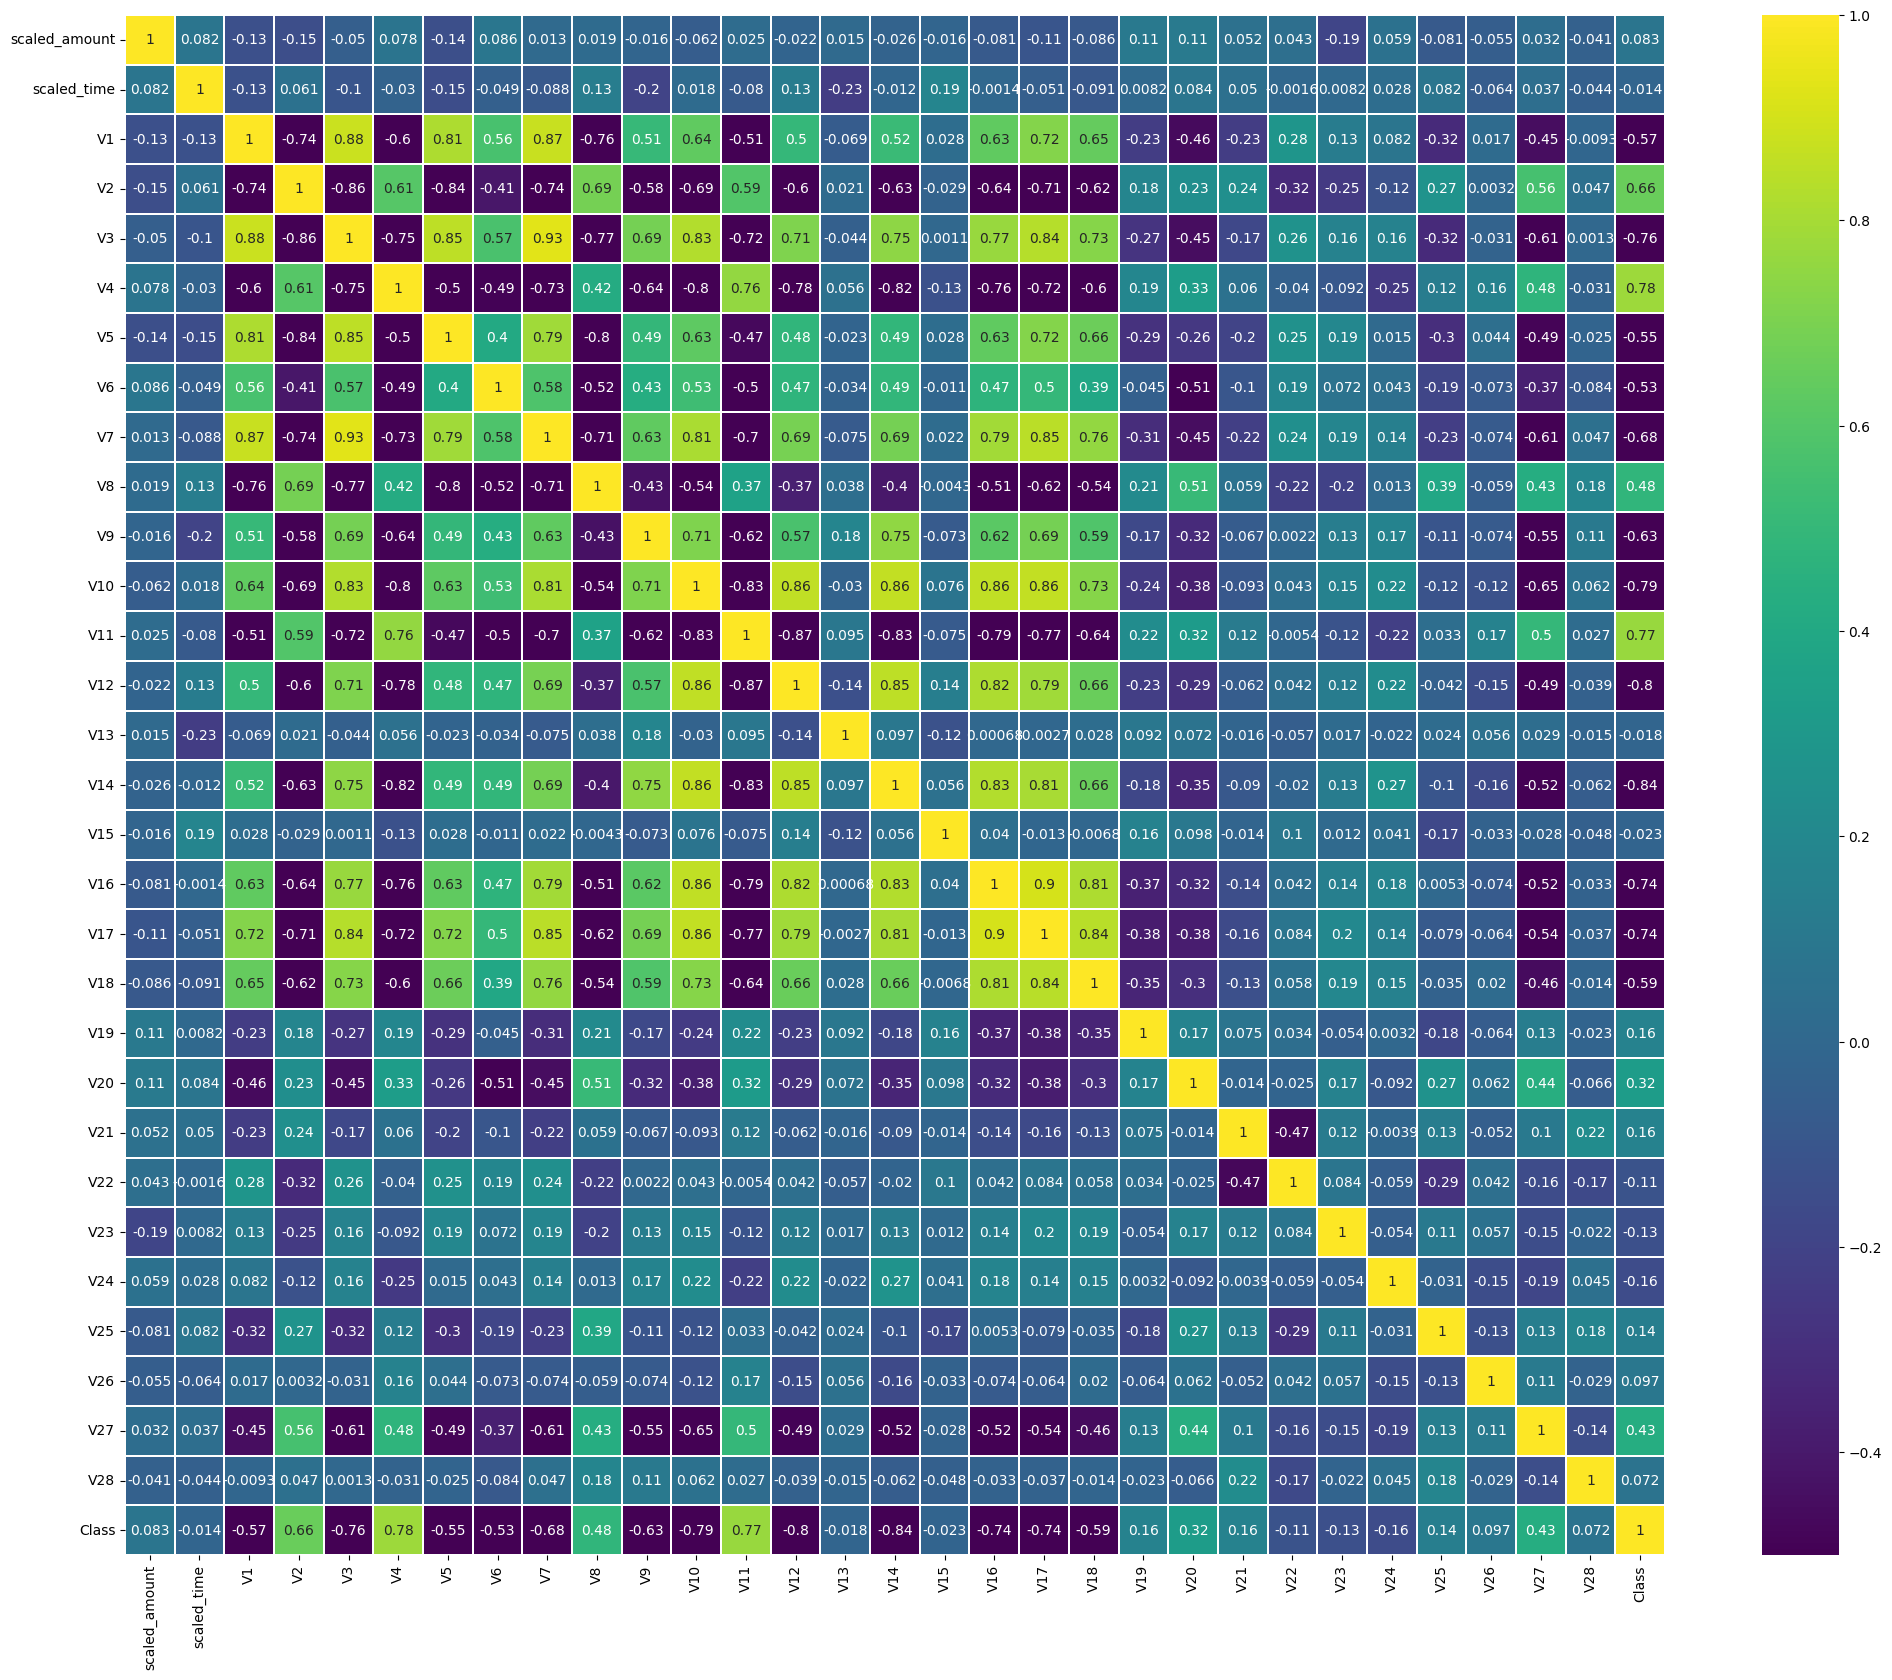

In [22]:
fig = plt.figure(figsize = (25, 20))
sns.heatmap(new_dataset.corr(), cmap='viridis', vmax = 1, vmin=-0.5 , square = True , linewidths= 0.05, annot=True)
plt.show()

In [23]:
X= new_dataset.drop(columns="Class",axis=1)
Y=new_dataset["Class"]

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [25]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [26]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred,Y_test)

Accuracy score :  0.9827586206896551
Model Precision: 1.0
Model Recall: 0.89
Model F1-Score: 0.94
Model ROC: 0.94 

              precision    recall  f1-score   support

       Valid       0.98      1.00      0.99        98
       Fraud       1.00      0.89      0.94        18

    accuracy                           0.98       116
   macro avg       0.99      0.94      0.97       116
weighted avg       0.98      0.98      0.98       116
 



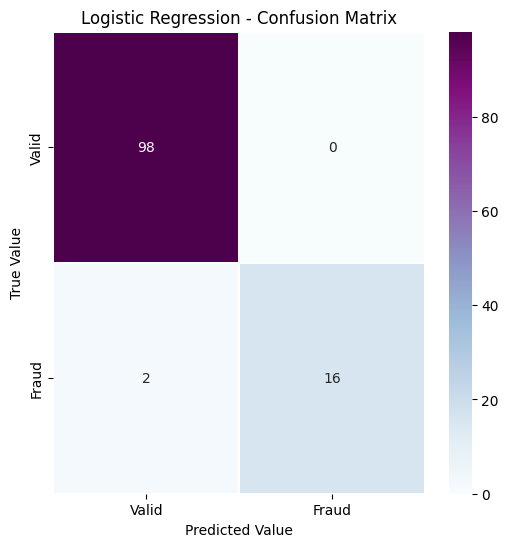

In [27]:
print('Accuracy score : ', accuracy)
print("Model Precision:", round(precision_score(Y_test, y_pred),2))
print("Model Recall:", round(recall_score(Y_test, y_pred),2))
print("Model F1-Score:", round(f1_score(Y_test, y_pred),2))
print("Model ROC:", round(roc_auc_score(Y_test, y_pred),2) , '\n')

conf_matrix=confusion_matrix(Y_test, y_pred)
labels= ['Valid', 'Fraud']
plt.figure(figsize=(6, 6))

sns.heatmap(pd.DataFrame(conf_matrix), xticklabels= labels, yticklabels= labels,
            linewidths= 0.05 ,annot=True, fmt="d" , cmap='BuPu')

print(classification_report(Y_test, y_pred, target_names=labels) , '\n')

plt.title("Logistic Regression - Confusion Matrix")
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
model1=rfc.fit(X_train,Y_train)
y_pred=model1.predict(X_test)
accuracy_score(Y_test,y_pred)

0.9913793103448276

Model Precision: 1.0
Model Recall: 0.94
Model F1-Score: 0.97
Model ROC: 0.97 

              precision    recall  f1-score   support

       Valid       0.99      1.00      0.99        98
       Fraud       1.00      0.94      0.97        18

    accuracy                           0.99       116
   macro avg       0.99      0.97      0.98       116
weighted avg       0.99      0.99      0.99       116
 



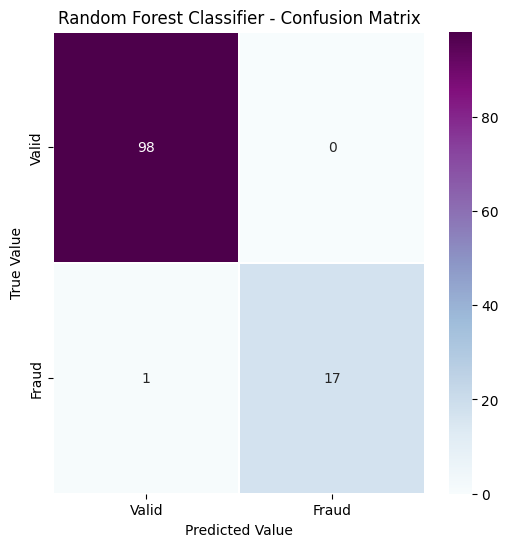

In [29]:
print("Model Precision:", round(precision_score(Y_test, y_pred),2))
print("Model Recall:", round(recall_score(Y_test, y_pred),2))
print("Model F1-Score:", round(f1_score(Y_test, y_pred),2))
print("Model ROC:", round(roc_auc_score(Y_test, y_pred),2) , '\n')

conf_matrix=confusion_matrix(Y_test, y_pred)
labels= ['Valid', 'Fraud']
plt.figure(figsize=(6, 6))

sns.heatmap(pd.DataFrame(conf_matrix), xticklabels= labels, yticklabels= labels,
            linewidths= 0.05 ,annot=True, fmt="d" , cmap='BuPu')

print(classification_report(Y_test, y_pred, target_names=labels) , '\n')

plt.title("Random Forest Classifier - Confusion Matrix")
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

Model Precision: 0.94
Model Recall: 0.89
Model F1-Score: 0.91
Model ROC: 0.94 

              precision    recall  f1-score   support

       Valid       0.98      0.99      0.98        98
       Fraud       0.94      0.89      0.91        18

    accuracy                           0.97       116
   macro avg       0.96      0.94      0.95       116
weighted avg       0.97      0.97      0.97       116
 



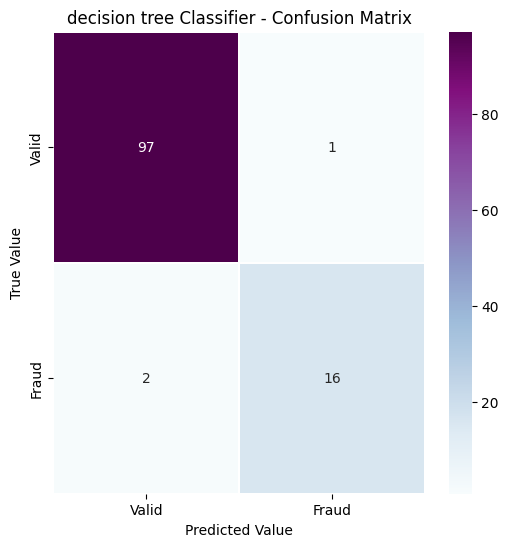

In [30]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
model3=dt.fit(X_train,Y_train)
y_pred=model3.predict(X_test)
accuracy_score(Y_test,y_pred)
print("Model Precision:", round(precision_score(Y_test, y_pred),2))
print("Model Recall:", round(recall_score(Y_test, y_pred),2))
print("Model F1-Score:", round(f1_score(Y_test, y_pred),2))
print("Model ROC:", round(roc_auc_score(Y_test, y_pred),2) , '\n')

conf_matrix=confusion_matrix(Y_test, y_pred)
labels= ['Valid', 'Fraud']
plt.figure(figsize=(6, 6))

sns.heatmap(pd.DataFrame(conf_matrix), xticklabels= labels, yticklabels= labels,
            linewidths= 0.05 ,annot=True, fmt="d" , cmap='BuPu')

print(classification_report(Y_test, y_pred, target_names=labels) , '\n')

plt.title("decision tree Classifier - Confusion Matrix")
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

In [31]:
import pickle
filename = "ccfdtrained_model.sav"
pickle.dump(model,open(filename,"wb"))

In [32]:
loaded_model = pickle.load(open('ccfdtrained_model.sav','rb'))